In [23]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns


In [24]:
df = pd.read_csv('layoffs_data.csv')
df.head()

,Company,Location,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,https://economictimes.indiatimes.com/tech/star...,292.0,Series E,2022-12-07 16:28:02,India,NaN,Unknown
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,https://www.bloomberglinea.com/english/brazili...,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.12,Unknown
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,https://techcrunch.com/2022/12/07/plaid-layoff...,734.0,Series D,2022-12-07 16:22:04,United States,0.20,https://docs.google.com/spreadsheets/d/1Tqw-Iu...
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,https://gomotive.com/blog/shoaib-makanis-messa...,567.0,Series F,2022-12-08 06:21:12,United States,0.06,Unknown
4,Relativity,Chicago,Legal,150.0,2022-12-07,https://www.chicagobusiness.com/technology/sof...,125.0,Private Equity,2022-12-08 06:22:20,United States,0.10,Unknown


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1757 non-null   object 
 1   Location                    1757 non-null   object 
 2   Industry                    1757 non-null   object 
 3   Laid_Off_Count              1237 non-null   float64
 4   Date                        1756 non-null   object 
 5   Source                      1757 non-null   object 
 6   Funds_Raised                1627 non-null   float64
 7   Stage                       1757 non-null   object 
 8   Date_Added                  1757 non-null   object 
 9   Country                     1757 non-null   object 
 10  Percentage                  1181 non-null   float64
 11  List_of_Employees_Laid_Off  1757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 164.8+ KB


In [26]:
df.isnull().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                520
Date                            1
Source                          0
Funds_Raised                  130
Stage                           0
Date_Added                      0
Country                         0
Percentage                    576
List_of_Employees_Laid_Off      0
dtype: int64

In [27]:
df.drop(columns = "Source", inplace = True)

In [28]:
df.dropna(inplace = False)
df.head()

,Company,Location,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,292.0,Series E,2022-12-07 16:28:02,India,NaN,Unknown
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.12,Unknown
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,734.0,Series D,2022-12-07 16:22:04,United States,0.20,https://docs.google.com/spreadsheets/d/1Tqw-Iu...
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,567.0,Series F,2022-12-08 06:21:12,United States,0.06,Unknown
4,Relativity,Chicago,Legal,150.0,2022-12-07,125.0,Private Equity,2022-12-08 06:22:20,United States,0.10,Unknown


In [29]:
dfz = df.copy()
print(dfz.shape)

(1757, 11)


In [30]:
dfz["zscore_Laid_Off_Count"] = np.abs(stats.zscore(dfz["Laid_Off_Count"]))
dfz.head()

,Company,Location,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,zscore_Laid_Off_Count
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,292.0,Series E,2022-12-07 16:28:02,India,NaN,Unknown,NaN
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.12,Unknown,NaN
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,734.0,Series D,2022-12-07 16:22:04,United States,0.20,https://docs.google.com/spreadsheets/d/1Tqw-Iu...,NaN
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,567.0,Series F,2022-12-08 06:21:12,United States,0.06,Unknown,NaN
4,Relativity,Chicago,Legal,150.0,2022-12-07,125.0,Private Equity,2022-12-08 06:22:20,United States,0.10,Unknown,NaN


In [31]:
z_outliers = dfz.loc[dfz["zscore_Laid_Off_Count"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [32]:
df.isnull().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                520
Date                            1
Funds_Raised                  130
Stage                           0
Date_Added                      0
Country                         0
Percentage                    576
List_of_Employees_Laid_Off      0
dtype: int64

In [33]:
print("The average score is:", df["Percentage"].mean())

The average score is: 0.27500635055038136


In [34]:
df["Percentage"].fillna(df["Percentage"].mean(), inplace = True)

In [35]:
print("The average score is:", df["Funds_Raised"].mean())

The average score is: 865.1698189920098


In [36]:
 print("The average score is:", df["Laid_Off_Count"].mean())

The average score is: 196.75586095392077


In [37]:
df["Funds_Raised"].fillna(df["Funds_Raised"].mean(), inplace = True)

In [38]:
df["Laid_Off_Count"].fillna(df["Laid_Off_Count"].mean(), inplace = True)

In [39]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,292.0,Series E,2022-12-07 16:28:02,India,0.275006,Unknown
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.120000,Unknown
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,734.0,Series D,2022-12-07 16:22:04,United States,0.200000,https://docs.google.com/spreadsheets/d/1Tqw-Iu...
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,567.0,Series F,2022-12-08 06:21:12,United States,0.060000,Unknown
4,Relativity,Chicago,Legal,150.0,2022-12-07,125.0,Private Equity,2022-12-08 06:22:20,United States,0.100000,Unknown


In [40]:
df.isnull().sum()

Company                       0
Location                      0
Industry                      0
Laid_Off_Count                0
Date                          1
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Percentage                    0
List_of_Employees_Laid_Off    0
dtype: int64

In [41]:
df.drop(columns = "Date", inplace = True)

In [42]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Vedantu,Bengaluru,Education,385.0,292.0,Series E,2022-12-07 16:28:02,India,0.275006,Unknown
1,Loft,Sao Paulo,Real Estate,312.0,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.120000,Unknown
2,Plaid,SF Bay Area,Finance,260.0,734.0,Series D,2022-12-07 16:22:04,United States,0.200000,https://docs.google.com/spreadsheets/d/1Tqw-Iu...
3,Motive,SF Bay Area,Transportation,237.0,567.0,Series F,2022-12-08 06:21:12,United States,0.060000,Unknown
4,Relativity,Chicago,Legal,150.0,125.0,Private Equity,2022-12-08 06:22:20,United States,0.100000,Unknown


In [52]:
bins = [100, 200, 300, 400]   #Created a new column binning the Age data 
bin_labels = ["Low_Laid_Off_Count", "Medium_Laid_Off Count", "High_Laid_Off_Count"]
df["Laid_Off_Count 2"] = pd.cut(df['Laid_Off_Count'], bins, labels = bin_labels)

In [53]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Laid_Off_Count 2
0,Vedantu,Bengaluru,Education,385.0,292.0,Series E,2022-12-07 16:28:02,India,0.275006,Unknown,High_Laid_Off_Count
1,Loft,Sao Paulo,Real Estate,312.0,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.120000,Unknown,High_Laid_Off_Count
2,Plaid,SF Bay Area,Finance,260.0,734.0,Series D,2022-12-07 16:22:04,United States,0.200000,https://docs.google.com/spreadsheets/d/1Tqw-Iu...,Medium_Laid_Off Count
3,Motive,SF Bay Area,Transportation,237.0,567.0,Series F,2022-12-08 06:21:12,United States,0.060000,Unknown,Medium_Laid_Off Count
4,Relativity,Chicago,Legal,150.0,125.0,Private Equity,2022-12-08 06:22:20,United States,0.100000,Unknown,Low_Laid_Off_Count


In [59]:
dfz["zscore_Funds_Raised"] = np.abs(stats.zscore(dfz["Funds_Raised"])

In [62]:
z_outliers = dfz.loc[dfz["zscore_Funds_Raised"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [68]:
dfz["zscore_Percentage"] = np.abs(stats.zscore(dfz["Percentage"]))

In [66]:
z_outliers = dfz.loc[dfz["zscore_Percentage"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [86]:
df["Laid_Off_Count"].groupby(df["Country"]).mean()

Country
Argentina                 64.600000
Australia                122.539350
Austria                  235.000000
Bahrain                  196.755861
Belgium                  196.755861
Brazil                   160.377806
Bulgaria                 120.000000
Canada                    95.627461
Chile                     30.000000
China                    492.161755
Colombia                 141.170574
Czech Republic           196.755861
Denmark                   60.000000
Egypt                    196.755861
Estonia                   66.750000
Finland                  250.000000
France                   196.755861
Germany                  126.678304
Greece                   196.755861
Hong Kong                224.702344
Hungary                  196.755861
India                    303.155185
Indonesia                234.693267
Ireland                  106.688965
Israel                    90.882276
Kenya                    123.751954
Lithuania                 60.000000
Luxembourg          

In [87]:
df["Laid_Off_Count"].groupby(df["Industry"]).mean()

Industry
Aerospace         175.751954
Construction      339.251353
Consumer          387.251395
Crypto            190.594291
Data              118.473080
Education         198.331641
Energy            162.343573
Finance           145.913626
Fitness           380.075811
Food              237.604985
HR                 79.688965
Healthcare        154.677152
Infrastructure    244.392292
Legal             102.094483
Logistics         138.192900
Marketing         107.136614
Media             108.258584
Other             167.906401
Product            77.621407
Real Estate       227.957419
Recruiting        134.242118
Retail            250.834038
Sales             169.060469
Security          129.916524
Support           115.924880
Transportation    315.617454
Travel            309.909054
Unknown           115.251954
Name: Laid_Off_Count, dtype: float64

In [88]:
df["Laid_Off_Count"].groupby(df["Location"]).mean()

Location
Ahmedabad     500.000000
Amsterdam    1296.688965
Ann Arbor      40.000000
Athens        196.755861
Atlanta       188.681083
                ...     
Waterloo      102.918620
Winnipeg      350.000000
Yangon        200.000000
Zug           196.755861
Zurich         62.000000
Name: Laid_Off_Count, Length: 162, dtype: float64

In [89]:
df.drop(columns = "List_of_Employees_Laid_Off", inplace = True)

In [90]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Funds_Raised,Stage,Date_Added,Country,Percentage,Laid_Off_Count 2
0,Vedantu,Bengaluru,Education,385.0,292.0,Series E,2022-12-07 16:28:02,India,0.275006,High_Laid_Off_Count
1,Loft,Sao Paulo,Real Estate,312.0,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.120000,High_Laid_Off_Count
2,Plaid,SF Bay Area,Finance,260.0,734.0,Series D,2022-12-07 16:22:04,United States,0.200000,Medium_Laid_Off Count
3,Motive,SF Bay Area,Transportation,237.0,567.0,Series F,2022-12-08 06:21:12,United States,0.060000,Medium_Laid_Off Count
4,Relativity,Chicago,Legal,150.0,125.0,Private Equity,2022-12-08 06:22:20,United States,0.100000,Low_Laid_Off_Count


In [91]:
df["Percentage"].groupby(df["Location"]).mean()

Location
Ahmedabad    0.500000
Amsterdam    0.271252
Ann Arbor    0.320000
Athens       0.275006
Atlanta      0.264646
               ...   
Waterloo     0.128335
Winnipeg     0.275006
Yangon       0.330000
Zug          0.275006
Zurich       0.500000
Name: Percentage, Length: 162, dtype: float64

In [92]:
df["Percentage"].groupby(df["Industry"]).mean()

Industry
Aerospace         0.468335
Construction      0.273463
Consumer          0.285300
Crypto            0.287078
Data              0.240253
Education         0.327336
Energy            0.247730
Finance           0.259477
Fitness           0.313706
Food              0.325828
HR                0.274094
Healthcare        0.279357
Infrastructure    0.300444
Legal             0.297502
Logistics         0.217354
Marketing         0.228786
Media             0.260923
Other             0.250836
Product           0.299201
Real Estate       0.306438
Recruiting        0.311252
Retail            0.292057
Sales             0.187143
Security          0.207802
Support           0.269041
Transportation    0.237902
Travel            0.334841
Unknown           0.240002
Name: Percentage, dtype: float64

In [93]:
df["Percentage"].groupby(df["Country"]).mean()

Country
Argentina               0.237001
Australia               0.356472
Austria                 0.272503
Bahrain                 0.275006
Belgium                 0.275006
Brazil                  0.222638
Bulgaria                0.100000
Canada                  0.241690
Chile                   0.275006
China                   0.253641
Colombia                0.193338
Czech Republic          0.275006
Denmark                 0.475003
Egypt                   0.387503
Estonia                 0.227503
Finland                 0.170000
France                  0.275006
Germany                 0.283023
Greece                  0.275006
Hong Kong               0.161001
Hungary                 0.140000
India                   0.302957
Indonesia               0.335954
Ireland                 0.260003
Israel                  0.237876
Kenya                   0.286667
Lithuania               0.275006
Luxembourg              0.168335
Malaysia                0.140000
Mexico                  0.271252
My

Text(0.5, 1.0, 'Laid Off Count by Country')

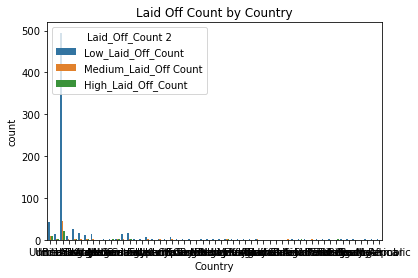

In [95]:
sns.countplot(data = df, x = "Country", hue = "Laid_Off_Count 2")
plt.title('Laid Off Count by Country')